<a href="https://colab.research.google.com/github/lancelotzomax/2021/blob/master/Seasonal_effect_on_negative_emotions_by_anxiety_depression_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seasonal effect on negative emotions (Part 1 - by anxiety depression words)
**Seasonal Affective Disorder (SAD)** is a form of depression due to seasonal changes. Environmental factors such as climates (rainfall, air pullution), sunlight and temperature influece humans' emotions. People may depress in specific seasons (e.g., autumn and winter) while recover from others (e.g., spring and summer). Hence, an investigation into the impact of seasonal changes on human's negative emotion can be conducted to better understand its influence.

To study the seasonal effect on speakers' emotions, we build an **Anxious Depression (AD) Prediction Model** to make prediction on AD in each season. We follow the "Anxiety Lexicon Base", which was proposed in the research **Anxious Depression Prediction in Real-time Social Data** by Akshi Kumar et al., label the quotes if anxiety depression-related words are included, and analyze the difference in the numbers of quotes in each month in the year 2015, 2017, 2018 and 2019*.

The following sub-sections elucidate the details of the model.

### 1. Data Collection & Import
The quote datasets from the year 2015, 2017, 2018, and 2019 are extracted using the 'Tutorial_Notebook' provided by the TA. The first 1 million quote data in each year are considered for this research. Each quotes’s data consists of 11 attributes: ID ('Unnamed: 0'), quoteID, quotation, speaker, qids, date, numOccurrences, probas, urls, phase ,and domains. 


### 2. Pre-processing
Pre-processing helps clean and filter the data required to undergo following feature extraction. The process includes:

* Extract the attributes of 'quotation', 'speaker', and 'date' from the original dataset of 1 million quotes and form a new dataframe

* Create a new column "anxiety feature" to label if the quotes include words in anxiety lexicon base.

* Parse the date and assign 'year' 'month' and 'date' into the dataframe

* Split the dataframe by month and form 12 dataframes 

### 3. Feature Engineering & Tokenization

In this step, we randomly booostrap 10000 samples from the dataframe of each month, and we repeat it for 30 times. The process includes

* Tokenization of quotation in each quote, including casefolding, tokenization, stopword removal, non-alphabet & non-number filtering.

* Label the quote if the quote includes words in anxiety_lexicon base 

* Record by month the numbers of quotes related to anxiety depression words

### 4. Plotting
Here, we make a boxplot descriping the number of quotes related to anxiety depression words in each month. 

In the following programming, the datasets from these 4 years undergo the aforementioned steps year by year. In the summary, a figure of multiplte boxplots explicating the number of negative quotes in each month in different years is plotted, and a line plot with errorbars is plotted to elucidate the variation in the number of negative quotes over months.


Ps. The data in 2016 and 2020 are ignored in our analysis as the lack amount of data in these two years may not be representative to present the anxiety depression over seasons.)




Mount the Google Drive to link to the dataset

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import package

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import dateutil.parser
import nltk, sklearn
import matplotlib.pyplot as plt

# Import textblob to perform sentiment analysis 
from textblob import TextBlob
from sklearn.utils import resample

# Import nltk to conduct word tokenization
from nltk import wordpunct_tokenize
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Process dataset in 2015

###1. Data Collection & Import

In [5]:
sample_2015 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2015_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2015

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2015-08-31-000271,... a great day for veterans here in Littleton...,Jeanne Shaheen,['Q270316'],2015-08-31 02:10:00,2,"[['Jeanne Shaheen', '0.742'], ['None', '0.2359...",['http://www.unionleader.com/article/20150831/...,E,"['com', 'com']"
1,1,2015-12-08-029916,How FFA scored 32 own goals in 18 months and C...,None,[],2015-12-08 00:00:00,2,"[['None', '0.563'], ['David Gallop', '0.437']]",['http://feeds.theroar.com.au/~r/theroar/~3/tZ...,E,"['com.au', 'com.au']"
2,2,2015-09-10-000206,[ Amy ] was placed under an unacceptable amoun...,None,[],2015-09-10 21:18:59,1,"[['None', '0.9634'], ['Amy Robinson', '0.0366']]",['http://www.thefashionspot.com/buzz-news/late...,E,['com']
3,3,2015-07-23-032707,How High Will These Numbers Go?,None,[],2015-07-23 14:57:49,3,"[['None', '0.9019'], ['Chubby Checker', '0.098...","['http://www.billboard.com/node/6641719', 'htt...",E,"['com', 'com', 'com']"
4,4,2015-10-04-000115,[ Ban ] recalls that hospitals and medical per...,Ban Ki-moon,['Q1253'],2015-10-04 08:27:38,2,"[['Ban Ki-moon', '0.8399'], ['None', '0.1601']]",['http://muslimnews.co.uk/news/middle-east/afg...,E,"['co.uk', 'co.uk']"
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-08-19-043795,I'm definitely not trying to bad-mouth the Blu...,Randy Wolf,['Q1064771'],2015-08-19 02:23:07,2,"[['Randy Wolf', '0.4833'], ['None', '0.412'], ...",['http://www.cbssports.com/mlb/writer/jon-heym...,E,"['com', 'com']"
999996,999996,2015-04-16-001100,A lot of that can only come from getting live ...,William Worth,['Q1401372'],2015-04-16 19:03:00,2,"[['William Worth', '0.7726'], ['None', '0.2274']]",['http://www.baltimoresun.com/sports/college/f...,E,"['com', 'com']"
999997,999997,2015-10-14-055008,I'm delighted that I was able to get 12 games ...,Freddie Woodman,['Q20127322'],2015-10-14 12:35:26,1,"[['Freddie Woodman', '0.7456'], ['None', '0.25...",['http://thefa.com/news/england/development/20...,E,['com']
999998,999998,2015-09-30-002515,A lot of the hard work has been done in the le...,Anne Field,['Q19335418'],2015-09-30 18:00:00,2,"[['Anne Field', '0.5315'], ['None', '0.4685']]",['http://dailyliberal.com.au/story/3393888/exc...,E,"['com.au', 'com.au']"


###2. Pre-processing

In [6]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2015)
selected_columns_2015 = sample_2015[['quotation', 'speaker', 'date']]

# Create a new column called 'anxiety_feature' 
# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2015[['anxiety_feature', 'year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2015)):
  dt = dateutil.parser.isoparse(selected_columns_2015.date[row])
  selected_columns_2015.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2015.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2015.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2015

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,quotation,speaker,date,anxiety_feature,year,month,day
0,... a great day for veterans here in Littleton...,Jeanne Shaheen,2015-08-31 02:10:00,0,2015,08,31
1,How FFA scored 32 own goals in 18 months and C...,None,2015-12-08 00:00:00,0,2015,12,08
2,[ Amy ] was placed under an unacceptable amoun...,None,2015-09-10 21:18:59,0,2015,09,10
3,How High Will These Numbers Go?,None,2015-07-23 14:57:49,0,2015,07,23
4,[ Ban ] recalls that hospitals and medical per...,Ban Ki-moon,2015-10-04 08:27:38,0,2015,10,04
...,...,...,...,...,...,...,...
999995,I'm definitely not trying to bad-mouth the Blu...,Randy Wolf,2015-08-19 02:23:07,0,2015,08,19
999996,A lot of that can only come from getting live ...,William Worth,2015-04-16 19:03:00,0,2015,04,16
999997,I'm delighted that I was able to get 12 games ...,Freddie Woodman,2015-10-14 12:35:26,0,2015,10,14
999998,A lot of the hard work has been done in the le...,Anne Field,2015-09-30 18:00:00,0,2015,09,30


In [7]:
# Split the dataframe by month
jan_data_2015 = selected_columns_2015[selected_columns_2015.month == '01']
feb_data_2015 = selected_columns_2015[selected_columns_2015.month == '02']
mar_data_2015 = selected_columns_2015[selected_columns_2015.month == '03']
apr_data_2015 = selected_columns_2015[selected_columns_2015.month == '04']
may_data_2015 = selected_columns_2015[selected_columns_2015.month == '05']
jun_data_2015 = selected_columns_2015[selected_columns_2015.month == '06']
jul_data_2015 = selected_columns_2015[selected_columns_2015.month == '07']
aug_data_2015 = selected_columns_2015[selected_columns_2015.month == '08']
sep_data_2015 = selected_columns_2015[selected_columns_2015.month == '09']
oct_data_2015 = selected_columns_2015[selected_columns_2015.month == '10']
nov_data_2015 = selected_columns_2015[selected_columns_2015.month == '11']
dec_data_2015 = selected_columns_2015[selected_columns_2015.month == '12']

###3. Feature Engineering & Tokenization

In [63]:
# Define a seed list of anxious depression related words

anxiety_lexicon_base = ['fat', 'bad', 'weak', 'problem', 'tired', 'illusion', 'restless', 'bored', 'crap', 'shit', 'fuck', 'sad', 'escape', 'useless', 'meaningless', 'crying', 'reject', 'suffer', 'sleepless', 'never', 'bored', 'afraid', 'unhappy', 'ugly', 'upset', 'awful', 'torture', 'unsuccessful', 'helpless', 'suffer', 'fail', 'sorrow', 'nobody', 'blame', 'damaged', 'shatter', 'pathetic', 'insomnia', 'kill', 'panic', 'lonely', 'hate', 'depressed', 'frustrated', 'loser', 'suicidal', 'hurt', 'painful', 'disappoint', 'broke', 'abandon', 'worthless', 'regret', 'dissatisfied', 'lost', 'empty', 'destroy', 'ruin', 'die', 'sick']

In [8]:
# Create a list to record the number of rows related to anxiety depression words in each month 
lst_2015 = []
lst_2015_month = []

# repeat to bootstrap for 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  jan_sample_data_2015 = resample(jan_data_2015, n_samples = 10000, replace = False, random_state = i)
  feb_sample_data_2015 = resample(feb_data_2015, n_samples = 10000, replace = False, random_state = i)
  mar_sample_data_2015 = resample(mar_data_2015, n_samples = 10000, replace = False, random_state = i)
  apr_sample_data_2015 = resample(apr_data_2015, n_samples = 10000, replace = False, random_state = i)
  may_sample_data_2015 = resample(may_data_2015, n_samples = 10000, replace = False, random_state = i)
  jun_sample_data_2015 = resample(jun_data_2015, n_samples = 10000, replace = False, random_state = i)
  jul_sample_data_2015 = resample(jul_data_2015, n_samples = 10000, replace = False, random_state = i)
  aug_sample_data_2015 = resample(aug_data_2015, n_samples = 10000, replace = False, random_state = i)
  sep_sample_data_2015 = resample(sep_data_2015, n_samples = 10000, replace = False, random_state = i)
  oct_sample_data_2015 = resample(oct_data_2015, n_samples = 10000, replace = False, random_state = i)
  nov_sample_data_2015 = resample(nov_data_2015, n_samples = 10000, replace = False, random_state = i)
  dec_sample_data_2015 = resample(dec_data_2015, n_samples = 10000, replace = False, random_state = i)

  # Combine sample data of 12 months into one dataframe
  data_frames = [jan_sample_data_2015, feb_sample_data_2015, mar_sample_data_2015, apr_sample_data_2015, may_sample_data_2015, jun_sample_data_2015, 
          jul_sample_data_2015, aug_sample_data_2015, sep_sample_data_2015, oct_sample_data_2015, nov_sample_data_2015, dec_sample_data_2015]
  sample_data = pd.concat(data_frames, axis=0, join='inner')
  
  # Reset index to undergo text mining
  sample_data.reset_index(inplace=True)

  # Tokenize sample_data 

  for j in range(len(sample_data)):
    # Casefolding: convert all in lowercase 
    sentence = sample_data.quotation[j].lower()

    # Tokenize the sentence 
    tokens = wordpunct_tokenize(sentence)

    # Remove the stopword
    filtered_tokens = [word for word in tokens if not word in stopwords]

    # Filter out tokens which are not alphabets or numbers 
    filtered_tokens2 = [word for word in filtered_tokens if word.isalnum()] 

    # Check if anxiety depression related words are included in a text
    flag = [word for word in filtered_tokens2 if word in anxiety_lexicon_base]
    
    # if yes, assign '1' into anxiety_feature
    if (len(flag) != 0):
      sample_data.anxiety_feature[j] = '1'

  # Choose rows in which anxiety_feature is '1'
  anxiety_rows_in_sample_data = sample_data[sample_data['anxiety_feature'] == '1']

  # group anxiety rows by the month
  grouped_anxiety_rows = anxiety_rows_in_sample_data.groupby(anxiety_rows_in_sample_data.month)
  
  # collect the number of anxiety rows in each month
  rows = grouped_anxiety_rows.size()

  # define the month in which the data derive from
  month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  # record the monthly number of anxiety rows into lst_2015 & the corresponding month into lst_2015_month
  lst_2015.append(rows)
  lst_2015_month.append(month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
# As we randomly sample the data for 30 times, lst_2015 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_2015)


30

###4. Plotting

In [10]:
# Convert lst_2015 & lst_2015_month into a 360x2 dataframe
lst_2015_array = np.array(lst_2015)
lst_2015_month_array = np.array(lst_2015_month) 

reshaped1 = lst_2015_array.reshape((360, 1))
reshaped2 = lst_2015_month_array.reshape((360, 1))

lst_2015_array_df = pd.DataFrame(reshaped1, columns=['number'])
lst_2015_month_array_df = pd.DataFrame(reshaped2, columns=['month'])

df_2015 = pd.concat([lst_2015_array_df, lst_2015_month_array_df], axis=1, join='inner')
df_2015

,number,month
0,635,Jan
1,612,Feb
2,675,Mar
3,617,Apr
4,632,May
...,...,...
355,605,Aug
356,625,Sep
357,593,Oct
358,667,Nov


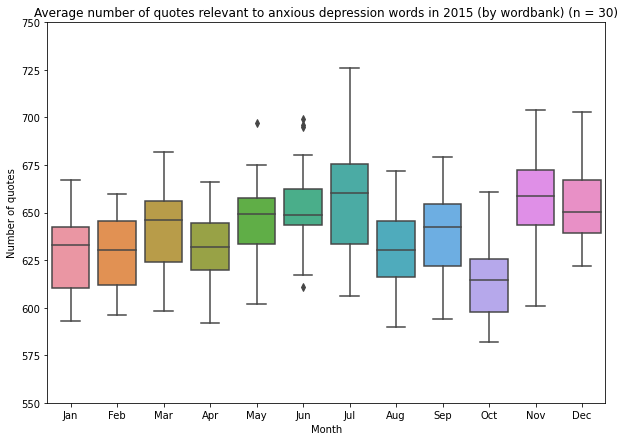

In [11]:
# Create plot
fig = plt.figure(figsize =(10, 7))

sns.color_palette("hls", 12)

sns.boxplot(x = 'month', y = 'number', data = df_2015)
plt.xlabel("Month")
plt.ylabel("Number of quotes")
plt.title('Average number of quotes relevant to anxious depression words in 2015 (by wordbank) (n = 30)')

y_ticks = np.arange(550, 770, 25)
plt.yticks(y_ticks)

plt.savefig('bootstraped_30_times_quotes_in_2015_by_wordbank', dpi=150)

## Process data in 2017

###1. Data Collection & Import

In [12]:
sample_2017 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2017_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2017

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2017-05-01-000095,[ A ] lot of the people who use The Muse sort ...,Kathryn Minshew,['Q6377094'],2017-05-01 17:00:00,1,"[['Kathryn Minshew', '0.7832'], ['None', '0.21...",['http://www.salon.com/2017/05/01/watch-do-com...,E,['com']
1,1,2017-09-12-090806,I've had and I'm having an amazing life. So I ...,Olivia Newton-John,['Q185165'],2017-09-12 00:00:00,14,"[['Olivia Newton-John', '0.5358'], ['None', '0...",['http://www.femalefirst.co.uk/celebrity/olivi...,E,"['co.uk', 'com', 'com', 'com', 'com', 'com', '..."
2,2,2017-10-24-000065,[ Although ] it highlights the urgent need for...,Radha Stirling,['Q7280196'],2017-10-24 23:57:43,2,"[['Radha Stirling', '0.7996'], ['None', '0.155...",['https://uk.news.yahoo.com/briton-caught-duba...,E,"['com', 'com']"
3,3,2017-12-04-073931,I've had both knees replaced and I walk with a...,None,[],2017-12-04 01:57:56,1,"[['None', '0.7649'], ['Paul Crowley', '0.2351']]",['https://www.itemlive.com/2017/12/03/lynn-sen...,E,['com']
4,4,2017-06-08-000150,"... and if the data so warrants, act for a bro...",Viral Acharya,['Q28076452'],2017-06-08 09:51:00,2,"[['Viral Acharya', '0.9557'], ['None', '0.0443']]",['http://economictimes.indiatimes.com/mf/analy...,E,"['com', 'com']"
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2017-05-24-146387,"You have been to the brink of death and back, ...",Larry Bird,['Q190152'],2017-05-24 04:52:05,1,"[['Larry Bird', '0.4201'], ['None', '0.3167'],...",['http://www.vvdailypress.com/news/20170523/pa...,E,['com']
999996,999996,2017-04-04-073336,It's weird because you start realising very qu...,Matt Okine,['Q17612856'],2017-04-04 06:09:05,1,"[['Matt Okine', '0.7874'], ['None', '0.2126']]",['http://junkee.com/sleep-much-now-pathetic-ma...,E,['com']
999997,999997,2017-10-24-167465,"You have Jordanian, Palestinian, and Israeli a...",Michael Leitner,['Q42428503'],2017-10-24 21:04:36,1,"[['Michael Leitner', '0.6156'], ['None', '0.38...",['http://bcheights.com/2017/10/24/leitner-help...,E,['com']
999998,999998,2017-03-19-033000,It's when we start to hear from people that so...,Matt Schwartz,['Q17277187'],2017-03-19 04:00:27,1,"[['Matt Schwartz', '0.5986'], ['None', '0.4014']]",['http://www.nola.com/business/index.ssf/2017/...,E,['com']


### 2. Pre-Processing

In [13]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2017)
selected_columns_2017 = sample_2017[['quotation', 'speaker', 'date']]

# Create a new column called 'anxiety_feature' 
# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2017[['anxiety_feature', 'year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2017)):
  dt = dateutil.parser.isoparse(selected_columns_2017.date[row])
  selected_columns_2017.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2017.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2017.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2017

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,quotation,speaker,date,anxiety_feature,year,month,day
0,[ A ] lot of the people who use The Muse sort ...,Kathryn Minshew,2017-05-01 17:00:00,0,2017,05,01
1,I've had and I'm having an amazing life. So I ...,Olivia Newton-John,2017-09-12 00:00:00,0,2017,09,12
2,[ Although ] it highlights the urgent need for...,Radha Stirling,2017-10-24 23:57:43,0,2017,10,24
3,I've had both knees replaced and I walk with a...,None,2017-12-04 01:57:56,0,2017,12,04
4,"... and if the data so warrants, act for a bro...",Viral Acharya,2017-06-08 09:51:00,0,2017,06,08
...,...,...,...,...,...,...,...
999995,"You have been to the brink of death and back, ...",Larry Bird,2017-05-24 04:52:05,0,2017,05,24
999996,It's weird because you start realising very qu...,Matt Okine,2017-04-04 06:09:05,0,2017,04,04
999997,"You have Jordanian, Palestinian, and Israeli a...",Michael Leitner,2017-10-24 21:04:36,0,2017,10,24
999998,It's when we start to hear from people that so...,Matt Schwartz,2017-03-19 04:00:27,0,2017,03,19


In [14]:
# Split the dataframe by month
jan_data_2017 = selected_columns_2017[selected_columns_2017.month == '01']
feb_data_2017 = selected_columns_2017[selected_columns_2017.month == '02']
mar_data_2017 = selected_columns_2017[selected_columns_2017.month == '03']
apr_data_2017 = selected_columns_2017[selected_columns_2017.month == '04']
may_data_2017 = selected_columns_2017[selected_columns_2017.month == '05']
jun_data_2017 = selected_columns_2017[selected_columns_2017.month == '06']
jul_data_2017 = selected_columns_2017[selected_columns_2017.month == '07']
aug_data_2017 = selected_columns_2017[selected_columns_2017.month == '08']
sep_data_2017 = selected_columns_2017[selected_columns_2017.month == '09']
oct_data_2017 = selected_columns_2017[selected_columns_2017.month == '10']
nov_data_2017 = selected_columns_2017[selected_columns_2017.month == '11']
dec_data_2017 = selected_columns_2017[selected_columns_2017.month == '12']

### 3. Feature Engineering & Tokenization

In [64]:
# Define a seed list of anxious depression related words

anxiety_lexicon_base = ['fat', 'bad', 'weak', 'problem', 'tired', 'illusion', 'restless', 'bored', 'crap', 'shit', 'fuck', 'sad', 'escape', 'useless', 'meaningless', 'crying', 'reject', 'suffer', 'sleepless', 'never', 'bored', 'afraid', 'unhappy', 'ugly', 'upset', 'awful', 'torture', 'unsuccessful', 'helpless', 'suffer', 'fail', 'sorrow', 'nobody', 'blame', 'damaged', 'shatter', 'pathetic', 'insomnia', 'kill', 'panic', 'lonely', 'hate', 'depressed', 'frustrated', 'loser', 'suicidal', 'hurt', 'painful', 'disappoint', 'broke', 'abandon', 'worthless', 'regret', 'dissatisfied', 'lost', 'empty', 'destroy', 'ruin', 'die', 'sick']

In [15]:
# Create a list to record the number of rows related to anxiety depression words in each month 
lst_2017 = []
lst_2017_month = []

# repeat to bootstrap for 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  # As the number of data in January, 2017 is less than 10 thousand, we do not take the data in this month into consideration
  feb_sample_data_2017 = resample(feb_data_2017, n_samples = 10000, replace = False, random_state = i)
  mar_sample_data_2017 = resample(mar_data_2017, n_samples = 10000, replace = False, random_state = i)
  apr_sample_data_2017 = resample(apr_data_2017, n_samples = 10000, replace = False, random_state = i)
  may_sample_data_2017 = resample(may_data_2017, n_samples = 10000, replace = False, random_state = i)
  jun_sample_data_2017 = resample(jun_data_2017, n_samples = 10000, replace = False, random_state = i)
  jul_sample_data_2017 = resample(jul_data_2017, n_samples = 10000, replace = False, random_state = i)
  aug_sample_data_2017 = resample(aug_data_2017, n_samples = 10000, replace = False, random_state = i)
  sep_sample_data_2017 = resample(sep_data_2017, n_samples = 10000, replace = False, random_state = i)
  oct_sample_data_2017 = resample(oct_data_2017, n_samples = 10000, replace = False, random_state = i)
  nov_sample_data_2017 = resample(nov_data_2017, n_samples = 10000, replace = False, random_state = i)
  dec_sample_data_2017 = resample(dec_data_2017, n_samples = 10000, replace = False, random_state = i)

  # Combine sample data of 12 months into one dataframe
  data_frames = [feb_sample_data_2017, mar_sample_data_2017, apr_sample_data_2017, may_sample_data_2017, jun_sample_data_2017, 
          jul_sample_data_2017, aug_sample_data_2017, sep_sample_data_2017, oct_sample_data_2017, nov_sample_data_2017, dec_sample_data_2017]
  sample_data = pd.concat(data_frames, axis=0, join='inner')
  
  # Reset index to undergo text mining
  sample_data.reset_index(inplace=True)

  # Tokenize sample_data 

  for j in range(len(sample_data)):
    # Casefolding: convert all in lowercase 
    sentence = sample_data.quotation[j].lower()

    # Tokenize the sentence 
    tokens = wordpunct_tokenize(sentence)

    # Remove the stopword
    filtered_tokens = [word for word in tokens if not word in stopwords]

    # Filter out tokens which are not alphabets or numbers 
    filtered_tokens2 = [word for word in filtered_tokens if word.isalnum()] 

    # Check if anxiety depression related words are included in a text
    flag = [word for word in filtered_tokens2 if word in anxiety_lexicon_base]
    
    # if yes, assign '1' into anxiety_feature
    if (len(flag) != 0):
      sample_data.anxiety_feature[j] = '1'

  # Choose rows in which anxiety_feature is '1'
  anxiety_rows_in_sample_data = sample_data[sample_data['anxiety_feature'] == '1']

  # group anxiety rows by the month
  grouped_anxiety_rows = anxiety_rows_in_sample_data.groupby(anxiety_rows_in_sample_data.month)
  
  # collect the number of anxiety rows in each month
  rows = grouped_anxiety_rows.size()

  # define the month in which the data derive from
  month = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  # record the monthly number of anxiety rows into lst_2017 and & the corresponding month into lst_2017_month
  lst_2017.append(rows)
  lst_2017_month.append(month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
# As we randomly sample the data for 30 times, lst_2017 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_2017)


30

### 4. Plotting

In [17]:
# Convert lst_2017 & lst_2017_month into a 360x2 dataframe
lst_2017_array = np.array(lst_2017)
lst_2017_month_array = np.array(lst_2017_month) 

reshaped1 = lst_2017_array.reshape((330, 1))
reshaped2 = lst_2017_month_array.reshape((330, 1))

lst_2017_array_df = pd.DataFrame(reshaped1, columns=['number'])
lst_2017_month_array_df = pd.DataFrame(reshaped2, columns=['month'])

df_2017 = pd.concat([lst_2017_array_df, lst_2017_month_array_df], axis=1, join='inner')
df_2017

,number,month
0,647,Feb
1,611,Mar
2,623,Apr
3,666,May
4,635,Jun
...,...,...
325,681,Aug
326,671,Sep
327,672,Oct
328,655,Nov


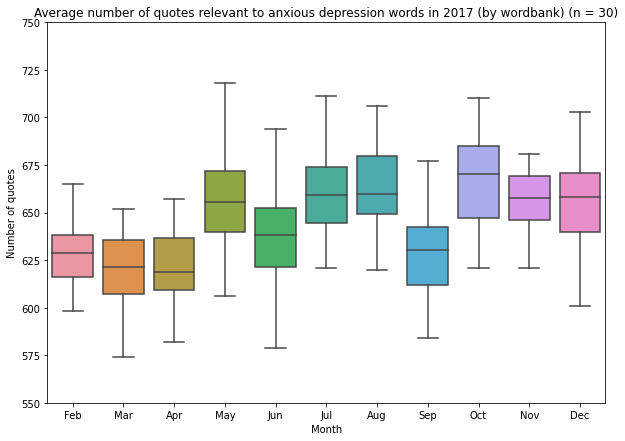

In [18]:
# Create plot
fig = plt.figure(figsize =(10, 7))

sns.color_palette("hls", 11)

sns.boxplot(x = 'month', y = 'number', data = df_2017)
plt.xlabel("Month")
plt.ylabel("Number of quotes")
plt.title('Average number of quotes relevant to anxious depression words in 2017 (by wordbank) (n = 30)')

y_ticks = np.arange(550, 770, 25)
plt.yticks(y_ticks)

plt.savefig('bootstraped_30_times_quotes_in_2017_by_wordbank', dpi=150)

##Process data in 2018

### 1. Data Collection & Imoport

In [19]:
sample_2018 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2018_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2018

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2018-06-30-000005,... a minimum of 5.25 trillion (plastic) parti...,Marcus Eriksen,['Q55997400'],2018-06-30 07:00:00,3,"[['Marcus Eriksen', '0.6814'], ['None', '0.318...",['http://www.santacruzsentinel.com/environment...,E,"['com', 'com', 'com']"
1,1,2018-12-06-000021,... a race to see who could sail around the wo...,James Marsh,"['Q2720543', 'Q41757028', 'Q56510432', 'Q61389...",2018-12-06 12:00:34,1,"[['James Marsh', '0.6787'], ['None', '0.3213']]",['http://filmthreat.com/reviews/the-mercy/'],E,['com']
2,2,2018-04-25-000107,... a tyrant whose chin might be lumps of grap...,None,[],2018-04-25 03:48:37,2,"[['None', '0.7475'], ['Oliver Stone', '0.1527'...",['https://slate.com/culture/2018/04/heres-how-...,E,"['com', 'com']"
3,3,2018-06-28-000032,[ Alberto ] attempted at this time to resolve ...,None,[],2018-06-28 04:01:03,2,"[['None', '0.6688'], ['El Patron', '0.3312']]",['http://comicbook.com/2018/06/28/alberto-el-p...,E,"['com', 'com']"
4,4,2018-09-15-000010,... Among the many observations I have receive...,None,[],2018-09-15 00:05:14,1,"[['None', '0.9496'], ['Pope Francis', '0.0504']]",['http://wjla.com/news/local/facing-calls-to-r...,E,['com']
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2018-09-07-012816,"But perhaps more importantly, these techniques...",Leo Smith,"['Q6524244', 'Q6524245']",2018-09-07 11:34:23,1,"[['Leo Smith', '0.9198'], ['None', '0.0802']]",['https://www.digitaltrends.com/cool-tech/anat...,E,['com']
999996,999996,2018-10-04-014443,But riders will be upset that the critically-n...,Craig Richards,"['Q5181367', 'Q5181370', 'Q5181371']",2018-10-04 01:34:51,2,"[['Craig Richards', '0.9278'], ['None', '0.072...",['http://www.smh.com.au/national/victoria/busy...,E,"['com.au', 'com.au']"
999997,999997,2018-07-05-010899,But salvation is on its way and there is a sol...,Andrea Leadsom,['Q750091'],2018-07-05 11:50:00,2,"[['Andrea Leadsom', '0.9093'], ['None', '0.090...",['https://stv.tv/news/politics/1421928-snp-mps...,E,"['tv', 'com']"
999998,999998,2018-07-23-011483,But... she just wanted to keep pushing... all ...,None,[],2018-07-23 00:00:00,1,"[['None', '0.7298'], ['Ronda Rousey', '0.1168'...",['http://www.foxnews.com/entertainment/2018/07...,E,['com']


###2. Pre-processing

In [20]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2018)
selected_columns_2018 = sample_2018[['quotation', 'speaker', 'date']]

# Create a new column called 'anxiety_feature' 
# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2018[['anxiety_feature', 'year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2018)):
  dt = dateutil.parser.isoparse(selected_columns_2018.date[row])
  selected_columns_2018.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2018.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2018.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2018

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,quotation,speaker,date,anxiety_feature,year,month,day
0,... a minimum of 5.25 trillion (plastic) parti...,Marcus Eriksen,2018-06-30 07:00:00,0,2018,06,30
1,... a race to see who could sail around the wo...,James Marsh,2018-12-06 12:00:34,0,2018,12,06
2,... a tyrant whose chin might be lumps of grap...,None,2018-04-25 03:48:37,0,2018,04,25
3,[ Alberto ] attempted at this time to resolve ...,None,2018-06-28 04:01:03,0,2018,06,28
4,... Among the many observations I have receive...,None,2018-09-15 00:05:14,0,2018,09,15
...,...,...,...,...,...,...,...
999995,"But perhaps more importantly, these techniques...",Leo Smith,2018-09-07 11:34:23,0,2018,09,07
999996,But riders will be upset that the critically-n...,Craig Richards,2018-10-04 01:34:51,0,2018,10,04
999997,But salvation is on its way and there is a sol...,Andrea Leadsom,2018-07-05 11:50:00,0,2018,07,05
999998,But... she just wanted to keep pushing... all ...,None,2018-07-23 00:00:00,0,2018,07,23


In [21]:
# Split the dataframe by month
jan_data_2018 = selected_columns_2018[selected_columns_2018.month == '01']
feb_data_2018 = selected_columns_2018[selected_columns_2018.month == '02']
mar_data_2018 = selected_columns_2018[selected_columns_2018.month == '03']
apr_data_2018 = selected_columns_2018[selected_columns_2018.month == '04']
may_data_2018 = selected_columns_2018[selected_columns_2018.month == '05']
jun_data_2018 = selected_columns_2018[selected_columns_2018.month == '06']
jul_data_2018 = selected_columns_2018[selected_columns_2018.month == '07']
aug_data_2018 = selected_columns_2018[selected_columns_2018.month == '08']
sep_data_2018 = selected_columns_2018[selected_columns_2018.month == '09']
oct_data_2018 = selected_columns_2018[selected_columns_2018.month == '10']
nov_data_2018 = selected_columns_2018[selected_columns_2018.month == '11']
dec_data_2018 = selected_columns_2018[selected_columns_2018.month == '12']

### 3. Feature Engineering & Tokenization

In [65]:
# Define a seed list of anxious depression related words

anxiety_lexicon_base = ['fat', 'bad', 'weak', 'problem', 'tired', 'illusion', 'restless', 'bored', 'crap', 'shit', 'fuck', 'sad', 'escape', 'useless', 'meaningless', 'crying', 'reject', 'suffer', 'sleepless', 'never', 'bored', 'afraid', 'unhappy', 'ugly', 'upset', 'awful', 'torture', 'unsuccessful', 'helpless', 'suffer', 'fail', 'sorrow', 'nobody', 'blame', 'damaged', 'shatter', 'pathetic', 'insomnia', 'kill', 'panic', 'lonely', 'hate', 'depressed', 'frustrated', 'loser', 'suicidal', 'hurt', 'painful', 'disappoint', 'broke', 'abandon', 'worthless', 'regret', 'dissatisfied', 'lost', 'empty', 'destroy', 'ruin', 'die', 'sick']

In [22]:
# Create a list to record the number of rows related to anxiety depression words in each month 
lst_2018 = []
lst_2018_month = []

# repeat to bootstrap for 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  jan_sample_data_2018 = resample(jan_data_2018, n_samples = 10000, replace = False, random_state = i)
  feb_sample_data_2018 = resample(feb_data_2018, n_samples = 10000, replace = False, random_state = i)
  mar_sample_data_2018 = resample(mar_data_2018, n_samples = 10000, replace = False, random_state = i)
  apr_sample_data_2018 = resample(apr_data_2018, n_samples = 10000, replace = False, random_state = i)
  may_sample_data_2018 = resample(may_data_2018, n_samples = 10000, replace = False, random_state = i)
  jun_sample_data_2018 = resample(jun_data_2018, n_samples = 10000, replace = False, random_state = i)
  jul_sample_data_2018 = resample(jul_data_2018, n_samples = 10000, replace = False, random_state = i)
  aug_sample_data_2018 = resample(aug_data_2018, n_samples = 10000, replace = False, random_state = i)
  sep_sample_data_2018 = resample(sep_data_2018, n_samples = 10000, replace = False, random_state = i)
  oct_sample_data_2018 = resample(oct_data_2018, n_samples = 10000, replace = False, random_state = i)
  nov_sample_data_2018 = resample(nov_data_2018, n_samples = 10000, replace = False, random_state = i)
  dec_sample_data_2018 = resample(dec_data_2018, n_samples = 10000, replace = False, random_state = i)

  # Combine sample data of 12 months into one dataframe
  data_frames = [jan_sample_data_2018, feb_sample_data_2018, mar_sample_data_2018, apr_sample_data_2018, may_sample_data_2018, jun_sample_data_2018, 
          jul_sample_data_2018, aug_sample_data_2018, sep_sample_data_2018, oct_sample_data_2018, nov_sample_data_2018, dec_sample_data_2018]
  sample_data = pd.concat(data_frames, axis=0, join='inner')
  
  # Reset index to undergo text mining
  sample_data.reset_index(inplace=True)

  # Tokenize sample_data 

  for j in range(len(sample_data)):
    # Casefolding: convert all in lowercase 
    sentence = sample_data.quotation[j].lower()

    # Tokenize the sentence 
    tokens = wordpunct_tokenize(sentence)

    # Remove the stopword
    filtered_tokens = [word for word in tokens if not word in stopwords]

    # Filter out tokens which are not alphabets or numbers 
    filtered_tokens2 = [word for word in filtered_tokens if word.isalnum()] 

    # Check if anxiety depression related words are included in a text
    flag = [word for word in filtered_tokens2 if word in anxiety_lexicon_base]
    
    # if yes, assign '1' into anxiety_feature
    if (len(flag) != 0):
      sample_data.anxiety_feature[j] = '1'

  # Choose rows in which anxiety_feature is '1'
  anxiety_rows_in_sample_data = sample_data[sample_data['anxiety_feature'] == '1']

  # group anxiety rows by the month
  grouped_anxiety_rows = anxiety_rows_in_sample_data.groupby(anxiety_rows_in_sample_data.month)
  
  # collect the number of anxiety rows in each month
  rows = grouped_anxiety_rows.size()

  # define the month in which the data derive from
  month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  # record the monthly number of anxiety rows into lst_2018 & the corresponding month into lst_2018_month
  lst_2018.append(rows)
  lst_2018_month.append(month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
# As we randomly sample the data for 30 times, lst_2018 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_2018)


30

### 4,. Plotting

In [24]:
# Convert lst_2018 & lst_2018_month into a 360x2 dataframe
lst_2018_array = np.array(lst_2018)
lst_2018_month_array = np.array(lst_2018_month) 

reshaped1 = lst_2018_array.reshape((360, 1))
reshaped2 = lst_2018_month_array.reshape((360, 1))

lst_2018_array_df = pd.DataFrame(reshaped1, columns=['number'])
lst_2018_month_array_df = pd.DataFrame(reshaped2, columns=['month'])

df_2018 = pd.concat([lst_2018_array_df, lst_2018_month_array_df], axis=1, join='inner')
df_2018

,number,month
0,621,Jan
1,626,Feb
2,664,Mar
3,648,Apr
4,645,May
...,...,...
355,653,Aug
356,656,Sep
357,669,Oct
358,611,Nov


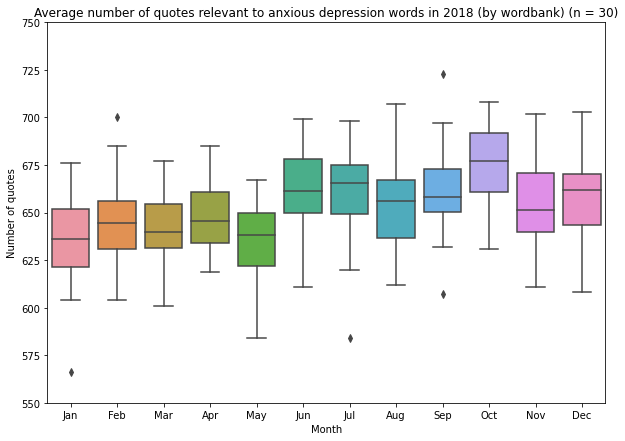

In [25]:
# Create plot
fig = plt.figure(figsize =(10, 7))

sns.color_palette("hls", 12)

sns.boxplot(x = 'month', y = 'number', data = df_2018)
plt.xlabel("Month")
plt.ylabel("Number of quotes")
plt.title('Average number of quotes relevant to anxious depression words in 2018 (by wordbank) (n = 30)')

y_ticks = np.arange(550, 770, 25)
plt.yticks(y_ticks)

plt.savefig('bootstraped_30_times_quotes_in_2018_by_wordbank', dpi=150)

##Process data in 2019

### 1. Data Collection & Import

In [26]:
sample_2019 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2019_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2019

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2019-10-14-000009,% 9: D: D @? 6 H2J H6 E9@F89E H6 4@F=5 8: G6 3...,None,[],2019-10-14 07:30:00,1,"[['None', '0.5595'], ['Julio Morales', '0.4405']]",['http://www.ivpressonline.com/news/local/ivc-...,E,['com']
1,1,2019-04-08-048753,It is immoral. It is harmful. It is hurtful.,President Donald Trump,['Q22686'],2019-04-08 16:22:00,44,"[['President Donald Trump', '0.5802'], ['None'...",['https://www.mercedsunstar.com/news/business/...,E,"['com', 'com', 'com', 'com', 'com', 'com', 'co..."
2,2,2019-07-17-000030,"[ Amber ] loves her son more than anything,",None,[],2019-07-17 22:54:35,1,"[['None', '0.8276'], ['Amber Portwood', '0.172...",['https://www.inquisitr.com/5535969/did-amber-...,E,['com']
3,3,2019-05-15-053302,It is important for our equine science student...,Sally Johnson,['Q42336656'],2019-05-15 18:03:22,1,"[['Sally Johnson', '0.5721'], ['None', '0.4279']]",['https://www.lanereport.com/113381/2019/05/qu...,E,['com']
4,4,2019-04-20-000011,... an Afrikaans family living in South Africa...,None,[],2019-04-20 22:30:57,1,"[['None', '0.8331'], ['you long', '0.1669']]",['http://filmthreat.com/reviews/the-harvester/'],E,['com']
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2019-08-09-046378,It was a great time tonight with all the playe...,David Dill,['Q5232978'],2019-08-09 23:59:21,1,"[['David Dill', '0.7727'], ['None', '0.2273']]",['http://atleasttwopeople.wordpress.com/2019/0...,E,['com']
999996,999996,2019-07-08-002735,All in all I am really pleased with how the tr...,John Dempster,['Q6229145'],2019-07-08 15:55:43,2,"[['John Dempster', '0.8656'], ['None', '0.1345']]",['https://www.chad.co.uk/sport/football/mansfi...,E,"['co.uk', 'co.uk']"
999997,999997,2019-04-10-056895,It was a huge shift for the providers to reall...,Barbara Poppe,['Q4859227'],2019-04-10 06:00:54,1,"[['Barbara Poppe', '0.8828'], ['None', '0.1172']]",['https://www.seattletimes.com/seattle-news/ho...,E,['com']
999998,999998,2019-08-01-002864,All it needs is to give journalists normal acc...,None,[],2019-08-01 05:00:18,6,"[['None', '0.7118'], ['Hua Chunying', '0.2781'...",['http://www.digitaljournal.com/news/world/uig...,E,"['com', 'com', 'com', 'com', 'com.ph', 'com']"


### 2. Pre-processing

In [27]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2018)
selected_columns_2019 = sample_2019[['quotation', 'speaker', 'date']]

# Create a new column called 'anxiety_feature' 
# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2019[['anxiety_feature', 'year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2019)):
  dt = dateutil.parser.isoparse(selected_columns_2019.date[row])
  selected_columns_2019.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2019.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2019.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2019

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,quotation,speaker,date,anxiety_feature,year,month,day
0,% 9: D: D @? 6 H2J H6 E9@F89E H6 4@F=5 8: G6 3...,None,2019-10-14 07:30:00,0,2019,10,14
1,It is immoral. It is harmful. It is hurtful.,President Donald Trump,2019-04-08 16:22:00,0,2019,04,08
2,"[ Amber ] loves her son more than anything,",None,2019-07-17 22:54:35,0,2019,07,17
3,It is important for our equine science student...,Sally Johnson,2019-05-15 18:03:22,0,2019,05,15
4,... an Afrikaans family living in South Africa...,None,2019-04-20 22:30:57,0,2019,04,20
...,...,...,...,...,...,...,...
999995,It was a great time tonight with all the playe...,David Dill,2019-08-09 23:59:21,0,2019,08,09
999996,All in all I am really pleased with how the tr...,John Dempster,2019-07-08 15:55:43,0,2019,07,08
999997,It was a huge shift for the providers to reall...,Barbara Poppe,2019-04-10 06:00:54,0,2019,04,10
999998,All it needs is to give journalists normal acc...,None,2019-08-01 05:00:18,0,2019,08,01


In [28]:
# Split the dataframe by month
jan_data_2019 = selected_columns_2019[selected_columns_2019.month == '01']
feb_data_2019 = selected_columns_2019[selected_columns_2019.month == '02']
mar_data_2019 = selected_columns_2019[selected_columns_2019.month == '03']
apr_data_2019 = selected_columns_2019[selected_columns_2019.month == '04']
may_data_2019 = selected_columns_2019[selected_columns_2019.month == '05']
jun_data_2019 = selected_columns_2019[selected_columns_2019.month == '06']
jul_data_2019 = selected_columns_2019[selected_columns_2019.month == '07']
aug_data_2019 = selected_columns_2019[selected_columns_2019.month == '08']
sep_data_2019 = selected_columns_2019[selected_columns_2019.month == '09']
oct_data_2019 = selected_columns_2019[selected_columns_2019.month == '10']
nov_data_2019 = selected_columns_2019[selected_columns_2019.month == '11']
dec_data_2019 = selected_columns_2019[selected_columns_2019.month == '12']

### 3. Feature Engineering & Tokenization

In [66]:
# Define a seed list of anxious depression related words

anxiety_lexicon_base = ['fat', 'bad', 'weak', 'problem', 'tired', 'illusion', 'restless', 'bored', 'crap', 'shit', 'fuck', 'sad', 'escape', 'useless', 'meaningless', 'crying', 'reject', 'suffer', 'sleepless', 'never', 'bored', 'afraid', 'unhappy', 'ugly', 'upset', 'awful', 'torture', 'unsuccessful', 'helpless', 'suffer', 'fail', 'sorrow', 'nobody', 'blame', 'damaged', 'shatter', 'pathetic', 'insomnia', 'kill', 'panic', 'lonely', 'hate', 'depressed', 'frustrated', 'loser', 'suicidal', 'hurt', 'painful', 'disappoint', 'broke', 'abandon', 'worthless', 'regret', 'dissatisfied', 'lost', 'empty', 'destroy', 'ruin', 'die', 'sick']

In [29]:
# Create a list to record the number of rows related to anxiety depression words in each month 
lst_2019 = []
lst_2019_month = []

# repeat to bootstrap for 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  jan_sample_data_2019 = resample(jan_data_2019, n_samples = 10000, replace = False, random_state = i)
  feb_sample_data_2019 = resample(feb_data_2019, n_samples = 10000, replace = False, random_state = i)
  mar_sample_data_2019 = resample(mar_data_2019, n_samples = 10000, replace = False, random_state = i)
  apr_sample_data_2019 = resample(apr_data_2019, n_samples = 10000, replace = False, random_state = i)
  may_sample_data_2019 = resample(may_data_2019, n_samples = 10000, replace = False, random_state = i)
  jun_sample_data_2019 = resample(jun_data_2019, n_samples = 10000, replace = False, random_state = i)
  jul_sample_data_2019 = resample(jul_data_2019, n_samples = 10000, replace = False, random_state = i)
  aug_sample_data_2019 = resample(aug_data_2019, n_samples = 10000, replace = False, random_state = i)
  sep_sample_data_2019 = resample(sep_data_2019, n_samples = 10000, replace = False, random_state = i)
  oct_sample_data_2019 = resample(oct_data_2019, n_samples = 10000, replace = False, random_state = i)
  nov_sample_data_2019 = resample(nov_data_2019, n_samples = 10000, replace = False, random_state = i)
  dec_sample_data_2019 = resample(dec_data_2019, n_samples = 10000, replace = False, random_state = i)

  # Combine sample data of 12 months into one dataframe
  data_frames = [jan_sample_data_2019, feb_sample_data_2019, mar_sample_data_2019, apr_sample_data_2019, may_sample_data_2019, jun_sample_data_2019, 
          jul_sample_data_2019, aug_sample_data_2019, sep_sample_data_2019, oct_sample_data_2019, nov_sample_data_2019, dec_sample_data_2019]
  sample_data = pd.concat(data_frames, axis=0, join='inner')
  
  # Reset index to undergo text mining
  sample_data.reset_index(inplace=True)

  # Tokenize sample_data 

  for j in range(len(sample_data)):
    # Casefolding: convert all in lowercase 
    sentence = sample_data.quotation[j].lower()

    # Tokenize the sentence 
    tokens = wordpunct_tokenize(sentence)

    # Remove the stopword
    filtered_tokens = [word for word in tokens if not word in stopwords]

    # Filter out tokens which are not alphabets or numbers 
    filtered_tokens2 = [word for word in filtered_tokens if word.isalnum()] 

    # Check if anxiety depression related words are included in a text
    flag = [word for word in filtered_tokens2 if word in anxiety_lexicon_base]
    
    # if yes, assign '1' into anxiety_feature
    if (len(flag) != 0):
      sample_data.anxiety_feature[j] = '1'

  # Choose rows in which anxiety_feature is '1'
  anxiety_rows_in_sample_data = sample_data[sample_data['anxiety_feature'] == '1']

  # group anxiety rows by the month
  grouped_anxiety_rows = anxiety_rows_in_sample_data.groupby(anxiety_rows_in_sample_data.month)
  
  # collect the number of anxiety rows in each month
  rows = grouped_anxiety_rows.size()

  # define the month in which the data derive from
  month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  # record the monthly number of anxiety rows into lst_2019
  lst_2019.append(rows)
  lst_2019_month.append(month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
# As we randomly sample the data for 30 times, lst_2019 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_2019)

30

### 4. Plotting

In [31]:
# Convert lst_2018 & lst_2018_month into a 360x2 dataframe
lst_2019_array = np.array(lst_2019)
lst_2019_month_array = np.array(lst_2019_month) 

reshaped1 = lst_2019_array.reshape((360, 1))
reshaped2 = lst_2019_month_array.reshape((360, 1))

lst_2019_array_df = pd.DataFrame(reshaped1, columns=['number'])
lst_2019_month_array_df = pd.DataFrame(reshaped2, columns=['month'])

df_2019 = pd.concat([lst_2019_array_df, lst_2019_month_array_df], axis=1, join='inner')
df_2019

,number,month
0,629,Jan
1,654,Feb
2,672,Mar
3,676,Apr
4,689,May
...,...,...
355,655,Aug
356,637,Sep
357,656,Oct
358,648,Nov


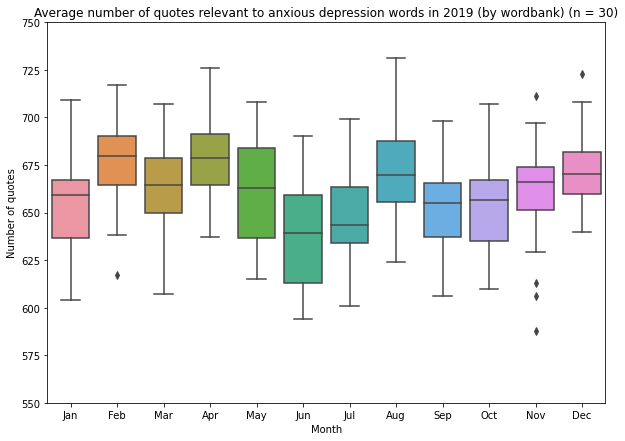

In [32]:
# Create plot
fig = plt.figure(figsize =(10, 7))

sns.color_palette("hls", 12)

sns.boxplot(x = 'month', y = 'number', data = df_2019)
plt.xlabel("Month")
plt.ylabel("Number of quotes")
plt.title('Average number of quotes relevant to anxious depression words in 2019 (by wordbank) (n = 30)')

y_ticks = np.arange(550, 770, 25)
plt.yticks(y_ticks)

plt.savefig('bootstraped_30_times_quotes_in_2019_by_wordbank', dpi=150)

### 5. Summary

Figure of multiplte boxplots explicating the number of negative quotes in each month in different years

In [33]:
df_2015['year'] = 2015
df_2017['year'] = 2017
df_2018['year'] = 2018
df_2019['year'] = 2019

df_all = pd.concat([df_2015, df_2017, df_2018, df_2019], axis=0, join='inner')

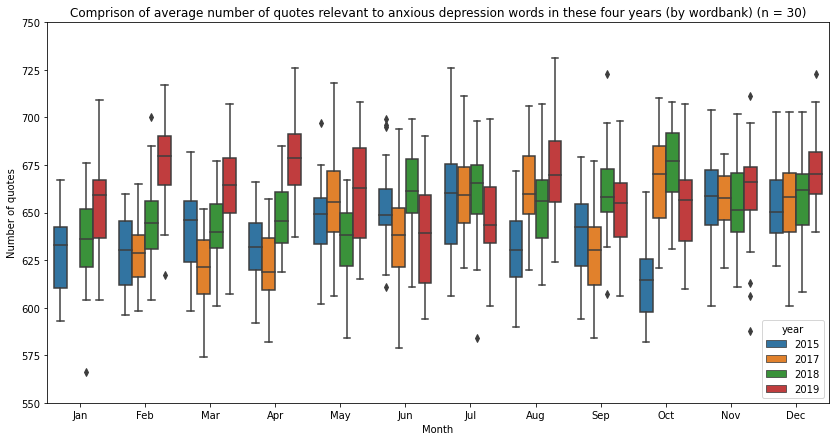

In [47]:
# Create plot
fig = plt.figure(figsize =(14, 7))

sns.boxplot(x = 'month', y = 'number', hue = 'year', data = df_all)
plt.xlabel("Month")
plt.ylabel("Number of quotes")
plt.title('Comprison of average number of quotes relevant to anxious depression words in these four years (by wordbank) (n = 30)')

y_ticks = np.arange(550, 770, 25)
plt.yticks(y_ticks)


plt.savefig('bootstraped_30_times_quotes_in_4_years_by_wordbank', dpi=150)

Line plot with errorbars elucidating the variation in the number of negative quotes over months.

In [59]:
grouped_month = df_all.groupby(df_all.month)
grouped_month_mean = grouped_month.mean()
grouped_month_std = grouped_month.std()
grouped_month_mean = grouped_month_mean.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
grouped_month_std = grouped_month_std.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
grouped_month_mean

,number,year
month,,
Jan,640.144444,2017.333333
Feb,644.433333,2017.250000
Mar,641.825000,2017.250000
Apr,644.558333,2017.250000
May,649.608333,2017.250000
Jun,647.566667,2017.250000
Jul,655.583333,2017.250000
Aug,654.933333,2017.250000
Sep,645.191667,2017.250000


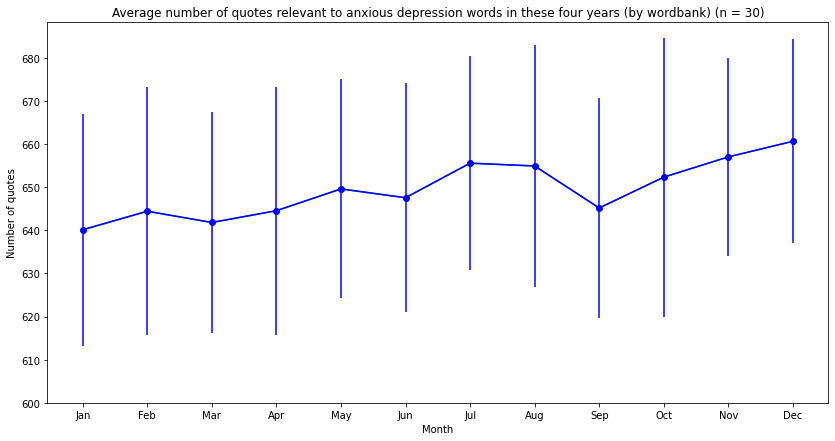

In [62]:
# Create plot
fig = plt.figure(figsize =(14, 7))

# sns.lineplot(x = grouped_month.index, y = 'number', data = grouped_month)
plt.plot(grouped_month_mean.index, grouped_month_mean.number)
plt.errorbar(grouped_month_mean.index, grouped_month_mean.number, yerr = grouped_month_std.number, fmt ='-bo')
grouped_month_std
plt.xlabel("Month")
plt.ylabel("Number of quotes")
plt.title('Average number of quotes relevant to anxious depression words in these four years (by wordbank) (n = 30)')

y_ticks = np.arange(600, 690, 10)
plt.yticks(y_ticks)
plt.savefig('lineplot_in_4_years_by_wordbank', dpi=150)